In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
sys.path.append('../resnet_model')

The aim of this is to check if the train, val and test are kind of representative. 

We want to be sure that the test classes are present in the train and what are the frequency. 

Get frequency graphs. 

In [3]:
from utils.general.dataset_variables import TripletSegmentationVariables 

In [4]:
import os
import json
from collections import Counter

def count_frequencies(annotation_dir, instruments, verbs, targets, verbtargets, triplets):
    """
    Counts the frequency of instrument-verb-target triplets in all JSON annotations,
    ensuring that all possible values appear with a default count of zero if not found.

    Args:
        annotation_dir (str): Directory containing JSON annotation files.
        instruments (list): List of possible instruments.
        verbs (list): List of possible verbs.
        targets (list): List of possible targets.
        verbtargets (list): List of possible verb-target pairs in "verb,target" format.
        triplets (list): List of possible triplets in "instrument,verb,target" format.

    Returns:
        tuple: Five dictionaries containing the counts of instruments, verbs, targets, verb-target pairs, and triplets.
    """
    
    # Initialize counters with all possible values set to 0
    instrument_counter = Counter({inst: 0 for inst in instruments.values()})
    verb_counter = Counter({verb: 0 for verb in verbs.values()})
    target_counter = Counter({tgt: 0 for tgt in targets.values()})
    verbtarget_counter = Counter({vt: 0 for vt in verbtargets.values()})
    triplet_counter = Counter({triplet: 0 for triplet in triplets.values()})

    # Iterate through all JSON files in the directory
    for file_name in os.listdir(annotation_dir):
        if file_name.endswith('.json'):
            file_path = os.path.join(annotation_dir, file_name)
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            # Process each shape in the annotation
            class_label_instance_id = set()
            for shape in data.get("shapes", []):
                label = shape.get("label")
                verb = shape.get("verb")
                target = shape.get("target")
                instance_id = shape.get("group_id")

                if (label, instance_id) in class_label_instance_id:
                    continue
                else:
                    class_label_instance_id.add((label, instance_id))
                    
                    # Update only if it is a valid instrument, verb, or target
                    if label in instrument_counter:
                        instrument_counter[label] += 1  
                    if verb in verb_counter:
                        verb_counter[verb] += 1  
                    if target in target_counter:
                        target_counter[target] += 1  
                    
                    verbtarget = f"{verb},{target}"
                    if verbtarget in verbtarget_counter:
                        verbtarget_counter[verbtarget] += 1  
                    
                    triplet = f"{label},{verb},{target}"
                    if triplet in triplet_counter:
                        triplet_counter[triplet] += 1  

    # Convert Counter to sorted dictionaries
    sorted_instruments = dict(sorted(instrument_counter.items(), key=lambda x: x[1], reverse=True))
    sorted_verbs = dict(sorted(verb_counter.items(), key=lambda x: x[1], reverse=True))
    sorted_targets = dict(sorted(target_counter.items(), key=lambda x: x[1], reverse=True))
    sorted_verbtargets = dict(sorted(verbtarget_counter.items(), key=lambda x: x[1], reverse=True))
    sorted_triplets = dict(sorted(triplet_counter.items(), key=lambda x: x[1], reverse=True))

    return sorted_instruments, sorted_verbs, sorted_targets, sorted_verbtargets, sorted_triplets


In [5]:

# dataset_path = 'C:/Users/tal22/Documents/repositories/triplet_segmentation/data/triplet_segmentation_dataset_v2_second_stage' 
# split = 'train'
# split_ann_dir = os.path.join(dataset_path, split, 'ann_dir') 

dataset_path = 'C:/Users/tal22/Documents/repositories/triplet_segmentation/data/triplet_segmentation_dataset_v2_second_stage' 
split = 'train/ann_dir'
split_ann_dir = os.path.join(dataset_path, split) 

instruments = TripletSegmentationVariables.categories['instrument']
verbs = TripletSegmentationVariables.categories['verb']
targets = TripletSegmentationVariables.categories['target']
verbtargets = TripletSegmentationVariables.categories['verbtarget']
triplets = TripletSegmentationVariables.categories['triplet']

sorted_instruments, sorted_verbs, sorted_targets, sorted_verbtargets, sorted_triplets  = count_frequencies(split_ann_dir, instruments, verbs, targets, verbtargets, triplets)

In [7]:
for instrument, frequency in sorted_instruments.items():
    print(f"{instrument}: {frequency}")

grasper: 9403
hook: 8256
bipolar: 1696
irrigator: 893
clipper: 604
scissors: 400


In [9]:
for verb, frequency in sorted_verbs.items():
    print(f"{verb}: {frequency}")

dissect: 8100
retract: 7825
grasp: 1537
null_verb: 1198
coagulate: 1052
clip: 528
aspirate: 528
cut: 332
irrigate: 152
pack: 0


In [27]:
(1/1)**0.2

1.0

In [10]:
for target, frequency in sorted_targets.items():
    print(f"{target}: {frequency}")

gallbladder: 10457
liver: 2895
cystic_duct: 2682
null_target: 1198
omentum: 1093
cystic_artery: 835
cystic_plate: 664
fluid: 528
specimen_bag: 368
abdominal_wall_cavity: 163
blood_vessel: 107
adhesion: 77
gut: 77
cystic_pedicle: 58
peritoneum: 50


In [11]:
for verbtarget, frequency in sorted_verbtargets.items():
    print(f"{verbtarget}: {frequency}")

retract,gallbladder: 4986
dissect,gallbladder: 4429
retract,liver: 1944
dissect,cystic_duct: 1807
null_verb,null_target: 1198
grasp,gallbladder: 1011
coagulate,liver: 745
dissect,omentum: 622
dissect,cystic_artery: 583
dissect,cystic_plate: 578
aspirate,fluid: 528
retract,omentum: 453
clip,cystic_duct: 384
grasp,specimen_bag: 368
retract,cystic_duct: 333
cut,cystic_duct: 155
clip,cystic_artery: 130
coagulate,blood_vessel: 105
irrigate,abdominal_wall_cavity: 100
cut,cystic_artery: 96
grasp,liver: 90
retract,gut: 75
dissect,adhesion: 70
cut,liver: 68
coagulate,abdominal_wall_cavity: 63
irrigate,liver: 48
coagulate,cystic_plate: 42
coagulate,gallbladder: 31
grasp,peritoneum: 27
coagulate,cystic_artery: 24
coagulate,cystic_pedicle: 24
grasp,cystic_plate: 22
retract,cystic_plate: 22
coagulate,omentum: 16
clip,cystic_pedicle: 13
grasp,cystic_pedicle: 12
retract,peritoneum: 11
dissect,peritoneum: 7
cut,adhesion: 7
cut,peritoneum: 5
dissect,cystic_pedicle: 4
irrigate,cystic_pedicle: 4
grasp,cy

In [38]:
# Display the result
for triplet, frequency in sorted_triplets.items():
    print(f"{triplet}: {frequency}")

grasper,retract,gallbladder: 17602
hook,dissect,gallbladder: 16092
hook,dissect,cystic_duct: 4688
grasper,retract,liver: 4351
grasper,grasp,gallbladder: 3066
hook,dissect,cystic_artery: 1812
hook,null_verb,null_target: 1809
hook,dissect,omentum: 1659
grasper,retract,omentum: 1452
bipolar,coagulate,liver: 1404
hook,dissect,cystic_plate: 1249
irrigator,aspirate,fluid: 1215
clipper,clip,cystic_duct: 1115
grasper,grasp,specimen_bag: 1075
grasper,null_verb,null_target: 988
clipper,clip,cystic_artery: 556
scissors,cut,cystic_duct: 385
scissors,cut,cystic_artery: 338
grasper,retract,cystic_duct: 333
grasper,retract,cystic_plate: 296
irrigator,null_verb,null_target: 267
grasper,grasp,peritoneum: 243
bipolar,null_verb,null_target: 209
bipolar,dissect,gallbladder: 190
grasper,retract,gut: 183
bipolar,coagulate,blood_vessel: 176
bipolar,dissect,omentum: 167
hook,retract,gallbladder: 167
irrigator,irrigate,abdominal_wall_cavity: 163
bipolar,coagulate,gallbladder: 152
bipolar,coagulate,abdominal_wa

## Testing bayes formula

In [40]:
import numpy as np

# Define the verb dictionary
from utils.general.dataset_variables import TripletSegmentationVariables

# Define the verbtarget and verb dictionary
verbtargets = TripletSegmentationVariables.categories['verbtarget']
verbs = TripletSegmentationVariables.categories['verb']
targets =  TripletSegmentationVariables.categories['target']


# Create a mapping of verb names to indices
verb_to_index = {verb: int(idx) - 1 for idx, verb in verbs.items()}
target_to_index = {target: int(idx) - 1 for idx, target in targets.items()}

# Initialize a 10x56 matrix with zeros
num_verbs = len(verbs)
num_targets = len(targets)
num_verbtargets = len(verbtargets)

verbtarget_to_verb_matrix = np.zeros((num_verbs, num_verbtargets), dtype=np.int32)
verbtarget_to_target_matrix = np.zeros((num_targets, num_verbtargets), dtype=np.int32)

# Populate the matrix
for vt_idx, vt in verbtargets.items():
    vt_idx = int(vt_idx) - 1  # Convert to 0-based index
    verb, target = vt.split(',')  # Extract the verb and target    
    verb_idx = verb_to_index[verb]  # Get the verb index
    target_idx = target_to_index[target]  # Get the taget index
    
    verbtarget_to_verb_matrix[verb_idx, vt_idx] = 1
    verbtarget_to_target_matrix[target_idx, vt_idx] = 1



In [41]:
# Print the matrix
print("Verb-Target to Verb Matrix:")
print(verbtarget_to_verb_matrix)

Verb-Target to Verb Matrix:
[[0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
  0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

In [57]:
verbtarget_to_verb_matrix.shape

(10, 56)

In [14]:
print("Verb-Target to Target Matrix:")
print(verbtarget_to_target_matrix)

Verb-Target to Target Matrix:
[[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
  0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

In [63]:
class_to_idx_zero_index_verbtarget = {value: int(key)-1 for key, value in verbtargets.items()} 
class_frequencies_verbtarget_by_id = np.array( [sorted_verbtargets[verb_target] for verb_target in sorted(sorted_verbtargets, key=class_to_idx_zero_index_verbtarget.get)]).reshape(-1, 1)
class_frequencies_verbtarget_by_id

array([[ 1303],
       [16358],
       [ 1944],
       [   19],
       [   44],
       [   12],
       [   95],
       [ 3066],
       [   28],
       [  106],
       [   36],
       [  243],
       [ 1088],
       [   11],
       [  334],
       [   11],
       [  296],
       [17791],
       [  183],
       [ 4531],
       [ 1508],
       [   76],
       [  144],
       [  211],
       [   57],
       [   34],
       [   61],
       [  149],
       [  242],
       [ 1501],
       [  147],
       [   14],
       [   70],
       [ 1917],
       [ 4846],
       [   18],
       [  126],
       [    0],
       [   95],
       [   75],
       [  338],
       [  385],
       [    0],
       [   68],
       [    6],
       [    5],
       [  556],
       [ 1115],
       [   13],
       [   14],
       [ 1215],
       [   47],
       [  163],
       [   18],
       [   66],
       [ 3462]])

In [67]:
result_matrix_of_verbs = np.matmul(verbtarget_to_verb_matrix, class_frequencies_verbtarget_by_id)
print(result_matrix_of_verbs)

print('....................')

class_to_idx_zero_index_verbs = {value: int(key)-1 for key, value in verbs.items()} 
class_frequencies_verbs_by_id = np.array( [sorted_verbs[verb] for verb in sorted(sorted_verbs, key=class_to_idx_zero_index_verbs.get)]).reshape(-1, 1)
print(class_frequencies_verbs_by_id)




[[ 4737]
 [24730]
 [26580]
 [ 2560]
 [ 1703]
 [ 1016]
 [ 1215]
 [  247]
 [   11]
 [ 3462]]
....................
[[ 4737]
 [24730]
 [26580]
 [ 2560]
 [ 1703]
 [ 1016]
 [ 1215]
 [  247]
 [   11]
 [ 3462]]


In [68]:
result_matrix_of_targets = np.matmul(verbtarget_to_target_matrix, class_frequencies_verbtarget_by_id)
print(result_matrix_of_targets)

print('....................')

class_to_idx_zero_index_targets = {value: int(key)-1 for key, value in targets.items()} 
class_frequencies_targets_by_id = np.array( [sorted_targets[target] for target in sorted(sorted_targets, key=class_to_idx_zero_index_targets.get)]).reshape(-1, 1)
print(class_frequencies_targets_by_id)




[[37468]
 [ 1857]
 [ 6758]
 [ 2887]
 [  162]
 [  234]
 [ 1215]
 [  307]
 [ 6272]
 [  145]
 [ 3641]
 [  554]
 [  211]
 [ 1088]
 [ 3462]]
....................
[[37468]
 [ 1857]
 [ 6758]
 [ 2887]
 [  162]
 [  234]
 [ 1215]
 [  307]
 [ 6272]
 [  145]
 [ 3641]
 [  554]
 [  211]
 [ 1088]
 [ 3462]]


## Visualization

In [12]:
import matplotlib.pyplot as plt

def plot_frequency_bar_chart(freq_dict, task):
    """
    Plot a bar chart for a frequency dictionary.

    Args:
        freq_dict (dict): Dictionary with names as keys and frequencies as values.
        title (str): Title for the plot.
    """
    # Sort dictionary by frequency
    
    names = [freq[0] for freq in freq_dict]
    print(names)
    frequencies = [freq[1] for freq in freq_dict]

    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(names, frequencies)
    plt.title(f'{task} distribution')
    plt.xlabel(task)
    plt.ylabel("Frequencies")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


['grasper', 'hook', 'bipolar', 'irrigator', 'clipper', 'scissors']


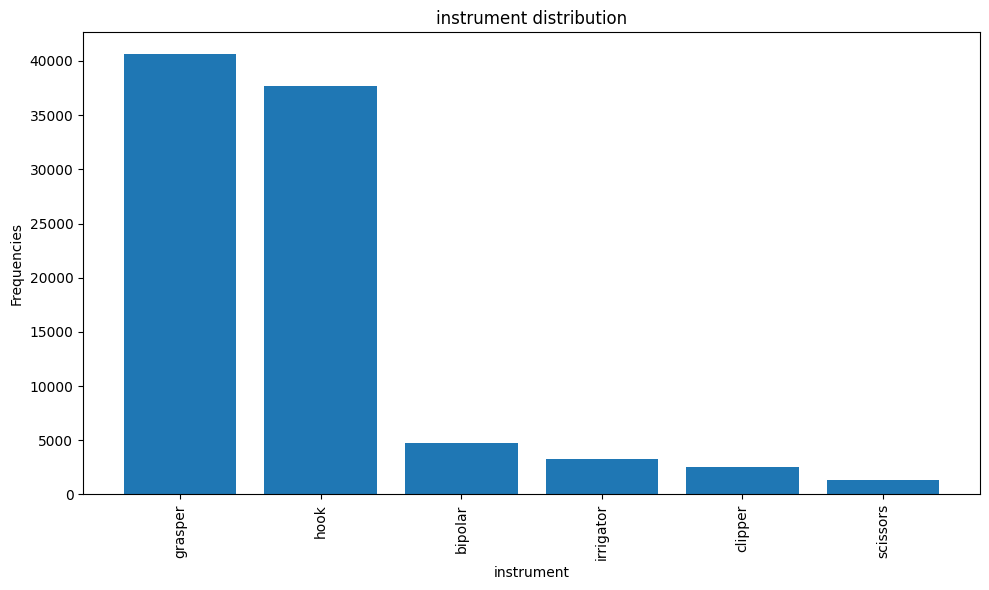

In [14]:
# Example usage
plot_frequency_bar_chart(sorted_instruments, task="instrument")

['dissect', 'retract', 'grasp', 'null_verb', 'coagulate', 'clip', 'aspirate', 'cut', 'irrigate', 'pack']


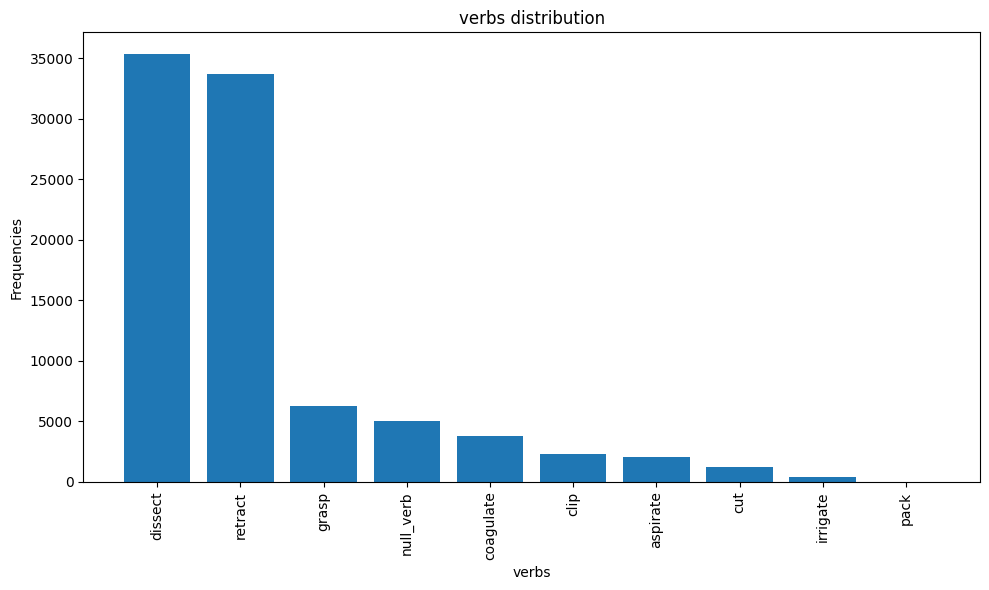

In [15]:
# Example usage
plot_frequency_bar_chart(sorted_verbs, task="verbs")

['gallbladder', 'liver', 'cystic_duct', 'null_target', 'omentum', 'cystic_artery', 'cystic_plate', 'fluid', 'specimen_bag', 'peritoneum', 'abdominal_wall_cavity', 'blood_vessel', 'gut', 'cystic_pedicle', 'adhesion']


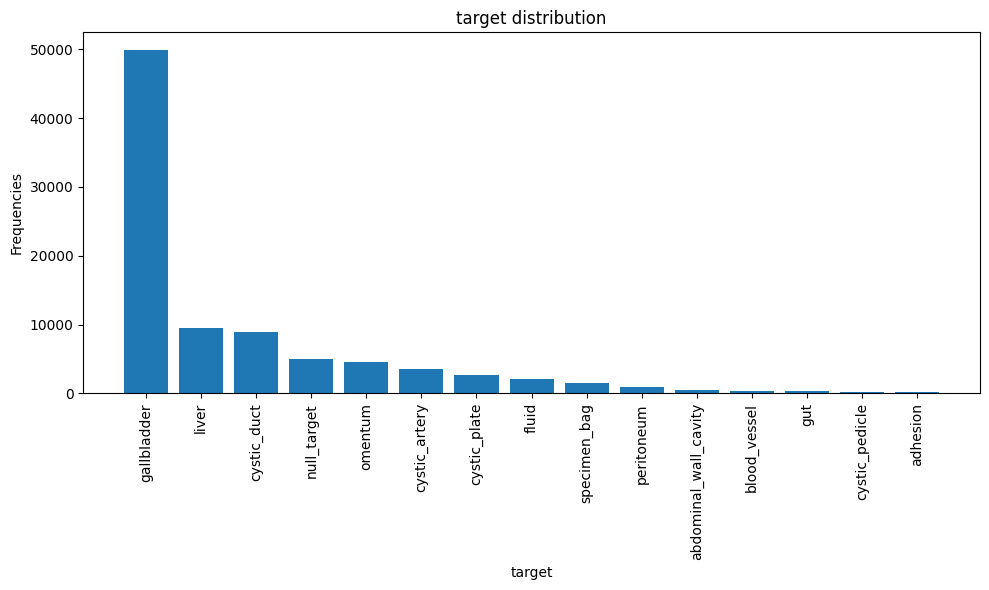

In [16]:
plot_frequency_bar_chart(sorted_targets, task="target")

['retract,gallbladder', 'dissect,gallbladder', 'retract,liver', 'dissect,cystic_duct', 'null_verb,null_target', 'grasp,gallbladder', 'dissect,omentum', 'dissect,cystic_artery', 'coagulate,liver', 'aspirate,fluid', 'retract,omentum', 'dissect,cystic_plate', 'clip,cystic_duct', 'grasp,specimen_bag', 'clip,cystic_artery', 'cut,cystic_duct', 'cut,cystic_artery', 'coagulate,gallbladder', 'retract,cystic_duct', 'retract,cystic_plate', 'grasp,cystic_duct', 'coagulate,cystic_plate', 'irrigate,abdominal_wall_cavity', 'coagulate,blood_vessel', 'dissect,peritoneum', 'grasp,peritoneum', 'retract,gut', 'coagulate,abdominal_wall_cavity', 'coagulate,omentum', 'retract,peritoneum', 'cut,peritoneum', 'grasp,liver', 'grasp,cystic_plate', 'irrigate,liver', 'cut,adhesion', 'dissect,cystic_pedicle', 'coagulate,cystic_pedicle', 'dissect,adhesion', 'cut,liver', 'coagulate,cystic_artery', 'coagulate,cystic_duct', 'grasp,omentum', 'grasp,gut', 'coagulate,peritoneum', 'clip,cystic_plate', 'irrigate,cystic_pedic

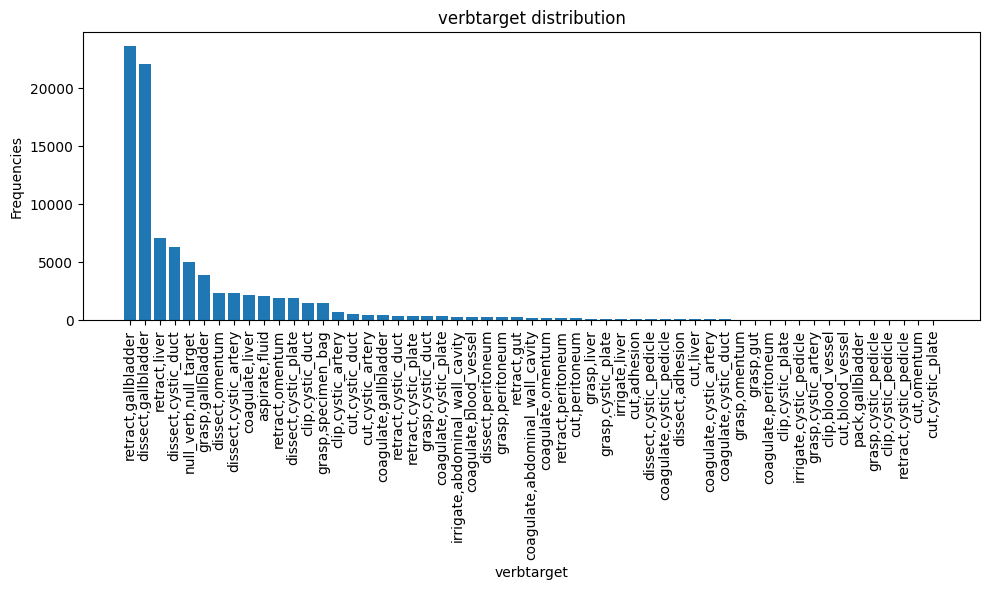

In [17]:
plot_frequency_bar_chart(sorted_verbtargets, task="verbtarget")

['grasper,retract,gallbladder', 'hook,dissect,gallbladder', 'grasper,retract,liver', 'hook,dissect,cystic_duct', 'grasper,grasp,gallbladder', 'hook,null_verb,null_target', 'hook,dissect,cystic_artery', 'hook,dissect,omentum', 'bipolar,coagulate,liver', 'irrigator,aspirate,fluid', 'grasper,retract,omentum', 'hook,dissect,cystic_plate', 'clipper,clip,cystic_duct', 'grasper,null_verb,null_target', 'grasper,grasp,specimen_bag', 'clipper,clip,cystic_artery', 'scissors,cut,cystic_duct', 'scissors,cut,cystic_artery', 'irrigator,null_verb,null_target', 'grasper,retract,cystic_duct', 'bipolar,null_verb,null_target', 'grasper,retract,cystic_plate', 'grasper,grasp,cystic_duct', 'bipolar,coagulate,cystic_plate', 'irrigator,irrigate,abdominal_wall_cavity', 'hook,dissect,peritoneum', 'grasper,grasp,peritoneum', 'grasper,retract,gut', 'clipper,null_verb,null_target', 'bipolar,coagulate,gallbladder', 'bipolar,coagulate,blood_vessel', 'bipolar,dissect,gallbladder', 'hook,retract,gallbladder', 'bipolar,

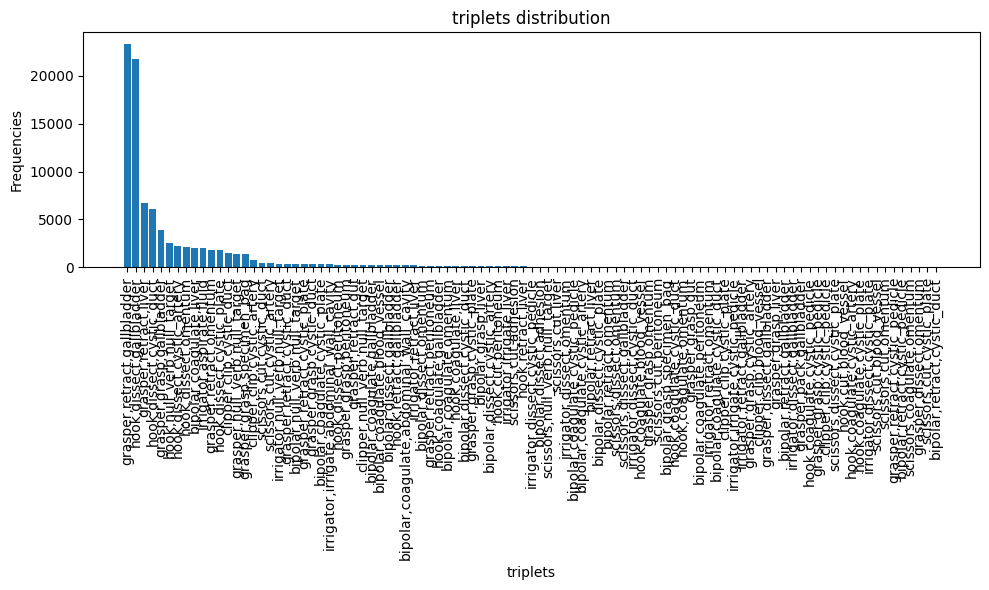

In [18]:
plot_frequency_bar_chart(sorted_triplets, task="triplets")

In [19]:
# with open(f"outputs/dataset_frequency_{split}.json", "w") as f:
#     json.dump(triplet_frequencies, f, indent=4)

# Compare splits

In [13]:
import json

def load_frequencies(file_path):
    """Load triplet frequency JSON and convert to dictionary."""
    with open(file_path, 'r') as f:
        return dict(json.load(f))

def compare_splits(train_freq, test_freq, val_freq=None):
    """
    Compare triplets across two or three splits.

    Args:
        train_freq (dict): Triplet frequencies for the first split (e.g., train).
        test_freq (dict): Triplet frequencies for the second split (e.g., test).
        val_freq (dict, optional): Triplet frequencies for the third split (e.g., val).

    Returns:
        dict: Intersection and differences between the splits.
    """
    split_train_set = set(train_freq.keys())
    split_test_set = set(test_freq.keys())
    split_val_set = set(val_freq.keys()) if val_freq else None

    # Intersections
    intersection_train_test = split_train_set & split_test_set
    intersection_train_val = split_train_set & split_val_set if split_val_set else None
    intersection_test_val = split_test_set & split_val_set if split_val_set else None
    intersection_all = split_train_set & split_test_set & split_val_set if split_val_set else None

    # Differences
    diff_train_test = split_train_set - split_test_set
    diff_test_train = split_test_set - split_train_set
    diff_train_val = split_train_set - split_val_set if split_val_set else None
    diff_test_val = split_test_set - split_val_set if split_val_set else None
    diff_val_train = split_val_set - split_train_set if split_val_set else None

    # Extract frequencies for intersections
    intersection_freq_train_test = {
        triplet: (train_freq[triplet], test_freq[triplet])
        for triplet in intersection_train_test
    }
    
    intersection_freq_train_val = {
        triplet: (train_freq[triplet], val_freq[triplet])
        for triplet in intersection_train_val
    }
    
    intersection_freq_test_val = {
        triplet: (test_freq[triplet], val_freq[triplet])
        for triplet in intersection_test_val
    }
    
    diff_freq_train_test = {
        triplet: train_freq[triplet]
        for triplet in diff_train_test
    }
    
    diff_freq_test_train = {
        triplet: test_freq[triplet]
        for triplet in diff_test_train
    }
    
    diff_freq_train_val = {
        triplet: train_freq[triplet]
        for triplet in diff_train_val
    }
    
    diff_freq_test_val = {
        triplet: test_freq[triplet]
        for triplet in diff_test_val
    }
    
    diff_freq_val_train = {
        triplet: val_freq[triplet]
        for triplet in diff_val_train
    }
    
    

    results = {
        "intersection_train_test": {
                                    'intersec_triplets': intersection_train_test, 
                                    'freq': intersection_freq_train_test
                                    },
        "intersection_train_val":  {
                                    'intersec_triplets': intersection_train_val, 
                                    'freq': intersection_freq_train_val
                                    },     
        "intersection_test_val": {
                                    'intersec_triplets': intersection_test_val, 
                                    'freq': intersection_freq_test_val
                                    },
        "intersection_all": intersection_all,
        "diff_train_test":  {
                                    'diff_triplets': diff_train_test, 
                                    'freq': diff_freq_train_test
                                    },
        "diff_test_train": {
                                    'diff_triplets': diff_test_train, 
                                    'freq': diff_freq_test_train
                                    },
        "diff_train_val": {
                                    'diff_triplets': diff_train_val, 
                                    'freq': diff_freq_train_val
                                    },
        "diff_test_val": {
                                    'diff_triplets': diff_test_val, 
                                    'freq': diff_freq_test_val
                                    },
        "diff_val_train": {
                                    'diff_triplets': diff_val_train, 
                                    'freq': diff_freq_val_train
                                    },
    }

    return results


In [14]:
from pprint import pprint

In [16]:
# Example usage
train_file = "outputs/dataset_frequency_train.json"
test_file = "outputs/dataset_frequency_test.json"
val_file = "outputs/dataset_frequency_val.json"

train_freq = load_frequencies(train_file)
test_freq = load_frequencies(test_file)
val_freq = load_frequencies(val_file)

# Compare train and test
# results_train_test = compare_splits(train_freq, test_freq)

# Compare train, test, and val
results_all_splits = compare_splits(train_freq, test_freq, val_freq)

print("Results:")
pprint(results_all_splits)
# Print or save results
# print("Train-Test Intersection Frequencies:")
# print(results_train_test["intersection_train_test"])

# print("\nTrain-Only Triplets:")
# print(results_train_test["diff_train_test"])

# print("\nTest-Only Triplets:")
# print(results_train_test["diff_test_train"])

# Optionally save the results to JSON
# with open("train_test_comparison.json", "w") as f:
#     json.dump(results_train_test, f, indent=4)

Results:
{'diff_test_train': {'diff_triplets': {'bipolar,coagulate,cystic_duct',
                                       'clipper,clip,cystic_plate',
                                       'irrigator,retract,gallbladder',
                                       'scissors,cut,cystic_plate',
                                       'scissors,dissect,cystic_plate'},
                     'freq': {'bipolar,coagulate,cystic_duct': 1,
                              'clipper,clip,cystic_plate': 10,
                              'irrigator,retract,gallbladder': 2,
                              'scissors,cut,cystic_plate': 3,
                              'scissors,dissect,cystic_plate': 12}},
 'diff_test_val': {'diff_triplets': {'bipolar,coagulate,cystic_artery',
                                     'bipolar,coagulate,cystic_duct',
                                     'bipolar,coagulate,cystic_plate',
                                     'bipolar,dissect,gallbladder',
                               

In [18]:
len(test_freq.keys())

49